In [4]:
# Imorting required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
orders=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\diminos_data_v2\diminos_data_v2\orders.csv")
order_details=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\diminos_data_v2\diminos_data_v2\order_items.csv")
products=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\diminos_data_v2\diminos_data_v2\products.csv")
deliveries=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\diminos_data_v2\diminos_data_v2\deliveries.csv")

In [8]:
print("Orders Shape: ",orders.shape)
print("Order_details Shape: ",order_details.shape)
print("Products Shape: ",products.shape)
print("Deliveries Shape: ",deliveries.shape)

Orders Shape:  (454336, 2)
Order_details Shape:  (454336, 2)
Products Shape:  (37, 5)
Deliveries Shape:  (1363008, 3)


# What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [11]:
deliveries.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [13]:
orders.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [15]:
order_details.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [17]:
products.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [19]:
deliveries.dtypes

order_id       int64
time_stamp    object
status        object
dtype: object

In [21]:
deliveries["time_stamp"]=pd.to_datetime(deliveries["time_stamp"])
deliveries.dtypes

order_id               int64
time_stamp    datetime64[ns]
status                object
dtype: object

In [23]:
deliveries1=deliveries.copy()
deliveries1["Time"]=deliveries1["time_stamp"].dt.time
deliveries1.head()

,order_id,time_stamp,status,Time
0,321230114,2020-12-11 00:01:29.000000000,Pending,00:01:29
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,00:06:29
2,321230114,2020-12-11 00:19:13.299151076,Delivered,00:19:13.299151
3,321230115,2020-12-11 00:36:02.000000000,Pending,00:36:02
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,00:41:02


In [25]:
deliveries1['Time'] = deliveries1['Time'].astype(str)
deliveries1['Time_in_minutes'] = pd.to_timedelta(deliveries1['Time']).dt.total_seconds() / 60
deliveries1.head()

,order_id,time_stamp,status,Time,Time_in_minutes
0,321230114,2020-12-11 00:01:29.000000000,Pending,00:01:29,1.483333
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,00:06:29,6.483333
2,321230114,2020-12-11 00:19:13.299151076,Delivered,00:19:13.299151,19.221653
3,321230115,2020-12-11 00:36:02.000000000,Pending,00:36:02,36.033333
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,00:41:02,41.033333


In [29]:
print("The Average Delivery time taken :{} minutes".format(np.round(deliveries1["Time_in_minutes"].mean(),2)))

The Average Delivery time taken :815.83 minutes


## What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [16]:
np.percentile(deliveries1["Time_in_minutes"],99)

1415.4492834691664

In [17]:
print("99th percentile Delivery Time taken by store : {} Minutes".format(np.percentile(deliveries1["Time_in_minutes"],99)))

99th percentile Delivery Time taken by store : 1415.4492834691664 Minutes


# Which metric is the better choice to determine the stores performance based on Delivery Time?

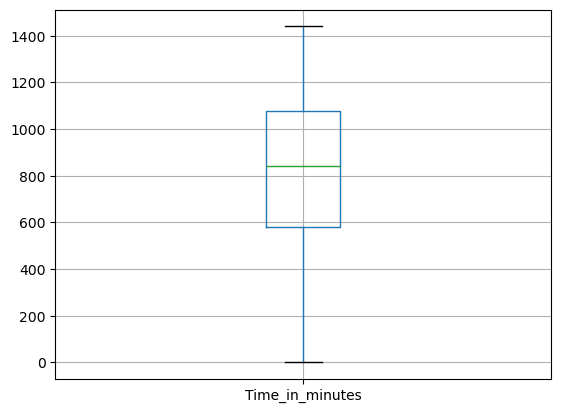

In [19]:
deliveries1[["Time_in_minutes"]].boxplot()
plt.show()

# What is the order id with the maximum delivery time

In [21]:
deliveries1[deliveries1["Time_in_minutes"]==deliveries1["Time_in_minutes"].max()]

,order_id,time_stamp,status,Time,Time_in_minutes
812512,321500950,2022-11-13 23:59:59.933468431,Delivered,23:59:59.933468,1439.998891


# How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [23]:
orders["order_placed_at"]=pd.to_datetime(orders["order_placed_at"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   order_id         454336 non-null  int64         
 1   order_placed_at  454336 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.9 MB


In [24]:
orders["Date"]=orders["order_placed_at"].dt.date
orders.head()

,order_id,order_placed_at,Date
0,321230114,2020-12-11 00:01:29,2020-12-11
1,321230115,2020-12-11 00:36:02,2020-12-11
2,321230116,2020-12-11 00:55:01,2020-12-11
3,321230117,2020-12-11 01:05:27,2020-12-11
4,321230118,2020-12-11 01:14:20,2020-12-11


In [25]:
oders_pizza=orders.groupby("Date")["order_id"].count().reset_index()
oders_pizza["Date"]=pd.to_datetime(oders_pizza["Date"])
oders_pizza.head()

,Date,order_id
0,2020-12-11,391
1,2020-12-12,402
2,2020-12-13,316
3,2020-12-14,444
4,2020-12-15,419


In [26]:
oders_pizza[oders_pizza["Date"].between("2024-01-01","2024-01-31")]["order_id"].sum()

12304

# How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?
*
This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.

In [28]:
deliveries1["Date"]=deliveries1["time_stamp"].dt.date
deliveries1["Date"]=pd.to_datetime(deliveries1["Date"])
deliveries1.head()

,order_id,time_stamp,status,Time,Time_in_minutes,Date
0,321230114,2020-12-11 00:01:29.000000000,Pending,00:01:29,1.483333,2020-12-11
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,00:06:29,6.483333,2020-12-11
2,321230114,2020-12-11 00:19:13.299151076,Delivered,00:19:13.299151,19.221653,2020-12-11
3,321230115,2020-12-11 00:36:02.000000000,Pending,00:36:02,36.033333,2020-12-11
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,00:41:02,41.033333,2020-12-11


In [29]:
deliveries1[(deliveries1["Date"].between("2024-01-01","2024-01-31")) & (deliveries1["Time_in_minutes"]>30)]

,order_id,time_stamp,status,Time,Time_in_minutes,Date
1326110,321672147,2024-01-01 00:31:05.366818534,Delivered,00:31:05.366818,31.089447,2024-01-01
1326111,321672152,2024-01-01 00:31:25.000000000,Out For Delivery,00:31:25,31.416667,2024-01-01
1326112,321672148,2024-01-01 00:31:30.702273281,Delivered,00:31:30.702273,31.511705,2024-01-01
1326113,321672155,2024-01-01 00:32:47.000000000,Pending,00:32:47,32.783333,2024-01-01
1326114,321672154,2024-01-01 00:32:50.000000000,Pending,00:32:50,32.833333,2024-01-01
...,...,...,...,...,...,...
1362999,321684443,2024-01-31 23:50:06.640104742,Delivered,23:50:06.640104,1430.110668,2024-01-31
1363000,321684449,2024-01-31 23:55:46.000000000,Pending,23:55:46,1435.766667,2024-01-31
1363001,321684447,2024-01-31 23:56:35.426400154,Delivered,23:56:35.426400,1436.590440,2024-01-31
1363002,321684448,2024-01-31 23:58:05.000000000,Pending,23:58:05,1438.083333,2024-01-31


In [30]:
deliveries1[(deliveries1["Date"].between("2024-01-01","2024-01-31")) & (deliveries1["Time_in_minutes"]>30)].shape[0]

36500

# What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [32]:
products.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [33]:
order_details.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [34]:
order_details["items_ordered"].unique()

array(["['p_025', 'p_032', 'p_037']", "['p_017', 'p_012']",
       "['p_027', 'p_037']", ..., "['p_001', 'p_031']",
       "['p_028', 'p_022']", "['p_008', 'p_031']"], dtype=object)

In [35]:
order_details.explode("items_ordered")

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"
...,...,...
454331,321684445,"['p_002', 'p_006', 'p_037']"
454332,321684446,"['p_015', 'p_013']"
454333,321684447,"['p_009', 'p_016']"
454334,321684448,"['p_007', 'p_003', 'p_037']"


In [36]:
order_details["items_ordered"].dtype

dtype('O')

In [37]:
import ast
order_details['items_ordered']=order_details['items_ordered'].apply(lambda x: x if isinstance(x, list) else ast.literal_eval(x))

In [38]:
df_explode=order_details.explode("items_ordered")
df_explode

,order_id,items_ordered
0,321230114,p_025
0,321230114,p_032
0,321230114,p_037
1,321230115,p_017
1,321230115,p_012
...,...,...
454334,321684448,p_007
454334,321684448,p_003
454334,321684448,p_037
454335,321684449,p_022


In [39]:
df_merge=pd.merge(products,df_explode,left_on="item_id",right_on="items_ordered",how="inner")
df_merge

,item_id,category,Item,Size,Price,order_id,items_ordered
0,p_001,Veg,Margherita,Regular,109,321230131,p_001
1,p_001,Veg,Margherita,Regular,109,321230135,p_001
2,p_001,Veg,Margherita,Regular,109,321230138,p_001
3,p_001,Veg,Margherita,Regular,109,321230165,p_001
4,p_001,Veg,Margherita,Regular,109,321230216,p_001
...,...,...,...,...,...,...,...
1158888,p_037,Veg,Coke,Regular,71,321684443,p_037
1158889,p_037,Veg,Coke,Regular,71,321684444,p_037
1158890,p_037,Veg,Coke,Regular,71,321684445,p_037
1158891,p_037,Veg,Coke,Regular,71,321684448,p_037


In [40]:
deliveries1.head()

,order_id,time_stamp,status,Time,Time_in_minutes,Date
0,321230114,2020-12-11 00:01:29.000000000,Pending,00:01:29,1.483333,2020-12-11
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,00:06:29,6.483333,2020-12-11
2,321230114,2020-12-11 00:19:13.299151076,Delivered,00:19:13.299151,19.221653,2020-12-11
3,321230115,2020-12-11 00:36:02.000000000,Pending,00:36:02,36.033333,2020-12-11
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,00:41:02,41.033333,2020-12-11


In [41]:
deliveries1["Year"]=deliveries1["time_stamp"].dt.year
deliveries1.head()

,order_id,time_stamp,status,Time,Time_in_minutes,Date,Year
0,321230114,2020-12-11 00:01:29.000000000,Pending,00:01:29,1.483333,2020-12-11,2020
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,00:06:29,6.483333,2020-12-11,2020
2,321230114,2020-12-11 00:19:13.299151076,Delivered,00:19:13.299151,19.221653,2020-12-11,2020
3,321230115,2020-12-11 00:36:02.000000000,Pending,00:36:02,36.033333,2020-12-11,2020
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,00:41:02,41.033333,2020-12-11,2020


In [42]:
df1_merge=pd.merge(df_merge,deliveries1,on="order_id",how="inner")
df1_merge.head()

,item_id,category,Item,Size,Price,order_id,items_ordered,time_stamp,status,Time,Time_in_minutes,Date,Year
0,p_001,Veg,Margherita,Regular,109,321230131,p_001,2020-12-11 03:47:25.000000000,Pending,03:47:25,227.416667,2020-12-11,2020
1,p_001,Veg,Margherita,Regular,109,321230131,p_001,2020-12-11 03:52:25.000000000,Out For Delivery,03:52:25,232.416667,2020-12-11,2020
2,p_001,Veg,Margherita,Regular,109,321230131,p_001,2020-12-11 04:06:12.744928691,Delivered,04:06:12.744928,246.212415,2020-12-11,2020
3,p_001,Veg,Margherita,Regular,109,321230135,p_001,2020-12-11 04:11:35.000000000,Pending,04:11:35,251.583333,2020-12-11,2020
4,p_001,Veg,Margherita,Regular,109,321230135,p_001,2020-12-11 04:16:35.000000000,Out For Delivery,04:16:35,256.583333,2020-12-11,2020


In [43]:
df1_merge[(df1_merge["Year"]==2023) & (df1_merge["Time_in_minutes"]>30)]

,item_id,category,Item,Size,Price,order_id,items_ordered,time_stamp,status,Time,Time_in_minutes,Date,Year
40854,p_001,Veg,Margherita,Regular,109,321520644,p_001,2023-01-01 01:38:05.000000000,Pending,01:38:05,98.083333,2023-01-01,2023
40855,p_001,Veg,Margherita,Regular,109,321520644,p_001,2023-01-01 01:43:05.000000000,Out For Delivery,01:43:05,103.083333,2023-01-01,2023
40856,p_001,Veg,Margherita,Regular,109,321520644,p_001,2023-01-01 02:03:17.223161767,Delivered,02:03:17.223161,123.287053,2023-01-01,2023
40857,p_001,Veg,Margherita,Regular,109,321520649,p_001,2023-01-01 01:48:14.000000000,Pending,01:48:14,108.233333,2023-01-01,2023
40858,p_001,Veg,Margherita,Regular,109,321520649,p_001,2023-01-01 01:53:14.000000000,Out For Delivery,01:53:14,113.233333,2023-01-01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445449,p_037,Veg,Coke,Regular,71,321672143,p_037,2023-12-31 23:53:43.000000000,Pending,23:53:43,1433.716667,2023-12-31,2023
3445450,p_037,Veg,Coke,Regular,71,321672143,p_037,2023-12-31 23:58:43.000000000,Out For Delivery,23:58:43,1438.716667,2023-12-31,2023
3445452,p_037,Veg,Coke,Regular,71,321672144,p_037,2023-12-31 23:53:06.000000000,Pending,23:53:06,1433.100000,2023-12-31,2023
3445453,p_037,Veg,Coke,Regular,71,321672144,p_037,2023-12-31 23:58:06.000000000,Out For Delivery,23:58:06,1438.100000,2023-12-31,2023


In [44]:
df1_merge[(df1_merge["Year"]==2023) & (df1_merge["Time_in_minutes"]>30)][["Price"]].sum()

Price    403570073
dtype: int64

# In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [83]:
df1_merge.head()

,item_id,category,Item,Size,Price,order_id,items_ordered,time_stamp,status,Time,Time_in_minutes,Date,Year
0,p_001,Veg,Margherita,Regular,109,321230131,p_001,2020-12-11 03:47:25.000000000,Pending,03:47:25,227.416667,2020-12-11,2020
1,p_001,Veg,Margherita,Regular,109,321230131,p_001,2020-12-11 03:52:25.000000000,Out For Delivery,03:52:25,232.416667,2020-12-11,2020
2,p_001,Veg,Margherita,Regular,109,321230131,p_001,2020-12-11 04:06:12.744928691,Delivered,04:06:12.744928,246.212415,2020-12-11,2020
3,p_001,Veg,Margherita,Regular,109,321230135,p_001,2020-12-11 04:11:35.000000000,Pending,04:11:35,251.583333,2020-12-11,2020
4,p_001,Veg,Margherita,Regular,109,321230135,p_001,2020-12-11 04:16:35.000000000,Out For Delivery,04:16:35,256.583333,2020-12-11,2020


In [99]:
df1_mege_new=df1_merge.groupby("Year")[["Price"]].sum()
df1_mege_new

,Price
Year,
2020,21165951
2021,383709676
2022,377174908
2023,408222371
2024,33230555


In [103]:
df1_mege_new[df1_mege_new["Price"]==df1_mege_new["Price"].min()]

,Price
Year,
2020,21165951


In [107]:
df1_mege_new[df1_mege_new["Price"]==df1_mege_new["Price"].min()].index[0]

2020

# How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [118]:
df1_merge["Price"].sum()

1223503461

# Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook.

# Poisson distribution